## Fixed-Point Iteration

> **Definition:**  $p$ is a *fixed point* of a function $g$ if $g(p)=p$.

Finding a fixed point and finding a root are related problems.  For example, a root of $f(x)=0$ is also a fixed point of $g(x)=x-\phi(x)f(x)$, where $\phi(x)$ is almost any function (there are some functions, like $\phi(x)=1/f(x)$ that would *not* work though).  As a result, given a suitable choice for $\phi(x)$, we can use an algorithm that finds a fixed point of $g(x)$ to find a root of $f(x)$.

Before looking for a fixed point, a reasonable question to ask is whether there is one, i.e. is there a solution to $g(x)=x$?  You should not be surprised that, just as the first step in root-finding is to bracket the root, our first step to find a fixed point is to find an interval that contains the fixed point.  In this case, this is an interval that the function maps onto itself as described in the following Theorem.

> **Theorem:**
> - If $g$ is a continuous function on the interval $[a,b]$ and $g(x) \in [a,b]$ for all $x \in [a,b]$, then $g$ has a fixed point $p \in [a,b]$.
> - If, in addition, $g'(x)$ exists on $[a,b]$ and $0<k<1$ exists with $|g'(x)|\leq k$ for all $x \in (a,b)$ the $p$ is unique.

The proof of the first statement is best constructed by first looking at a picture illustrating the situation:

<img src="./img/FixedPoint.png" width="400">

Note that the requirement that $g(x) \in [a,b]$ for all $x \in [a,b]$ translates into the requirement that $g(x)$ enters the box in the picture above along the left edge and exits along the right edge.  It therefore as little choice but to cross the diagonal (the line $y=x$) in traversing the box.  Mathematically, you can define an auxiliary function 

$$ h(x) = x- g(x) $$

and the constraints on $g(x)$ translate into the requirement that $h(a) \leq 0$ and $h(b) \geq 0$.  The Intermediate Value Theorem (or the corollary, Bolzano's theorem) then states that their exists $p$ with $h(p)=0$, or $p=g(p)$.  

The second statement restricts the function $g(x)$ from crossing the line $y=x$ more than once as once it has crossed the line $y=x$ to cross it again would require its derivative to be greater than 1 (to "overtake" the line $y=x$ whose slope is 1).

Note that the theorem only gives "sufficient conditions" for when a fixed point is sure to exist.  It is possible for a fixed point to exist without these conditions being met. How do we find the fixed point?  A very simple guess is to just try the following sequence:

> **Definition:**  Given $p_0$, the sequence
>
> $$ p_{n+1}=g(p_n),\qquad\qquad n=0,1,2,\ldots$$
>
> is called a *fixed point iteration* scheme.

A good question to ask is: When does this sequence converge to a fixed point?  

> **Theorem:**
> If $g$ is a continuous function on the interval $[a,b]$ and $g(x) \in [a,b]$ for all $x \in [a,b]$, and $|g'(x)| \leq k < 1$ for all $x \in (a,b)$ then
> given $p_1\in [a,b]$, the sequence $p_{n+1}=g(p_n),\, n=0,1,2,\ldots$ converges to a unique fixed point $p$ in $[a,b]$.

The proof is fairly straightforward and instructive.  Using the definition of the sequence and the fixed point,

$$
\begin{align}
|p_{n+1}-p|&=|g(p_n)-g(p)|\\
&= |g'(\xi)(p_n-p)|\\
&\leq k|p_n-p|
\end{align}
$$

where the second line is true for some $\xi\in (p_n,p)$ by the [Mean Value Theorem](https://en.wikipedia.org/wiki/Mean_value_theorem), and the last line just makes use of the bound on the derivative.  As this expression is true for any $n$ we can apply it iteratively to get

$$
\begin{align}
|p_{n+1}-p| \leq k|p_n-p| &\leq k^2|p_{n-1}-p|\\
&\vdots\\
&\leq k^n|p_1-p|
\end{align}
$$

This in turn implies that $\lim_{n\rightarrow \infty} |p_{n+1}-p| =0$ since $k<1$.

$$
\blacksquare
$$

From the proof we can note a few things (when the conditions of the theorem are satisfied
- Given that $|p_{n+1}-p| \leq k|p_n-p|$ we can see that the method has order of convergence 1, assuming $k>0$.
- In the neighborhood of the root, the smaller $|g'(p)|$ is, the faster we will converge to the root once we are in that neighborhood.
- $E_f=|p_{n+1}-p| \leq k^n \,\,{\rm max}\{p_1-a,b-p_1\}$ provides a calculatable bound on the forward error.

We cannot practically do an infinite number of iterations so we will have to stop at some point when the error is small enough.  As usual, the backward error is easily computed as $E_b=|p_{n+1}-g(p_n)|$ but that is rarely used as a stopping criteria.  As we do no know $p$, we can only bound the forward error.  However, that requires as input the bound $k$ on the derivative.  As users are often too lazy to provide this, a common stopping criteria is to look at the difference between our current guess and our last one. It is possible to prove that for linear convergence

$$
|p_{n+1}-p| \approx C |p_{n+1}-p_n|,
$$

for some $C\neq 0$, and not guaranteed to be small.  In principle we should come up with an estimate for $C$ but this is rarely done as it requires similar work as bounding $|g(x)|$ on the interval.

Coding up a fixed point iteration scheme is almost trivial though:

In [6]:
def FixPointIteration(g, p0, tol, maxN = 100, output = True):
    # The p0 argument here is our initial guess
    
    # print output table headings
    if (output):
        print("         p(i+1)                    g( p(i) )") 

    # main loop
    for i in range(1,maxN):
        p1 = g(p0)

        if (output):
            print(f"{p0:>20} {p1:>24}")

        if (abs(p1-p0) < tol) :
            print("Converged in", i, "iterations")
            return p1
        else :
            p0 = p1
    
    # if we finish the main loop without returning from the FixPointIteration function, we have failed.  :( 
    print(f"Error: Could not find fixed point to within {tol} in {maxN} iterations. Returning best guess so far.")
    return p1

As with the bisection routine, we set both a maximum number of iterations and a psuedo-forward error test (we don't have an estimate of the $C$ above so this test is only roughly proportional to the forward error).

**Example:** Let's use our Fixed Point Iteration function to find a fixed point of the function $g(x)=e^{-x}\cos{x}$.  As with root finding, our first step is always to plot the function to get some idea of regions where we might be able to find a fixed point (note that the scheme does not require any bracketing of the fixed point, but if the conditions of the theorem above are not met, we likely won't find what we are looking for).  In this case we plot $y=x$ as well as $g(x)$ as the fixed points are locations where these two lines cross.

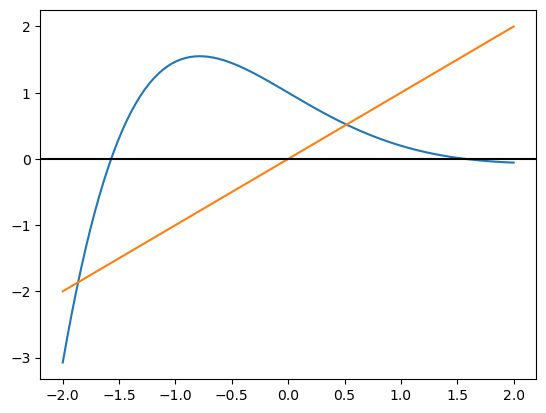

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def my_g(x):
    return np.exp(-x)*np.cos(x)
    
x = np.linspace(-2.0,2.0, num=100)
plt.plot(x, my_g(x))
plt.plot(x, x)
plt.axhline(0, color='black')
plt.show()

Here we see there are two fixed point visible in the interval we plotted over, where the line $y=x$ and the plot of our $g(x)$ cross, one near $-1.9$ and another near $0.5$.  In the region $[0,1]$ it looks like our $g(x)$ probably satisfies the requirements of our theorem in that it maps an interval onto itself and it looks like the slope is less than one.  This suggests the fixed point iteration scheme should be able to find the fixed point near $0.5$.  Let's see if it works:

In [9]:
root = FixPointIteration(my_g,0.5, 0.001)
print("Best guess for fixed point is ", root)

         p(i+1)                    g( p(i) )
                 0.5       0.5322807302156708
  0.5322807302156708        0.506017150823715
   0.506017150823715       0.5273387574874205
  0.5273387574874205       0.5099980321976492
  0.5099980321976492       0.5240808264172857
  0.5240808264172857       0.5126303136484097
  0.5126303136484097       0.5219316831931609
  0.5219316831931609       0.5143701817534934
  0.5143701817534934       0.5205133906614345
  0.5205133906614345       0.5155198768147499
  0.5155198768147499       0.5195771679746161
  0.5195771679746161       0.5162794483407539
  0.5162794483407539       0.5189590586183047
  0.5189590586183047       0.5167812134870264
  0.5167812134870264       0.5185509283524781
  0.5185509283524781       0.5171126466905065
  0.5171126466905065       0.5182814255955307
  0.5182814255955307       0.5173315575733446
Converged in 18 iterations
Best guess for fixed point is  0.5173315575733446


As expected, it does converged, although not terribly quickly.  Let's try finding the second fixed point near $x=-1.9$ by giving a guess closer to that one:

In [8]:
root = FixPointIteration(my_g, -1.9, 0.001)
print("Best guess for fixed point is ", root)

         p(i+1)                    g( p(i) )
                -1.9       -2.161479918339569
  -2.161479918339569       -4.836359427829768
  -4.836359427829768       15.581504473709394
  15.581504473709394   -1.696511121979884e-07
-1.696511121979884e-07        1.000000169651112
   1.000000169651112      0.19876602410835303
 0.19876602410835303       0.8036017644473938
  0.8036017644473938      0.31076619849211157
 0.31076619849211157       0.6977796779572575
  0.6977796779572575       0.3813645670468432
  0.3813645670468432       0.6338656390190758
  0.6338656390190758       0.4274770079691997
  0.4274770079691997       0.5934682131658137
  0.5934682131658137      0.45794967972580625
 0.45794967972580625       0.5673988724136764
  0.5673988724136764      0.47815072244569323
 0.47815072244569323       0.5504021086808643
  0.5504021086808643      0.49154486576105705
 0.49154486576105705       0.5392606113390594
  0.5392606113390594       0.5004194958147331
  0.5004194958147331       0.5319

Not surprisingly, this does not coverge to the fixed point we wanted near $-1.9$ but, after jumping around a bit, it does eventually coverge back to the fixed point near $0.5$.  Sometimes fixed points are categorized as being "attractive" when there is a neighborhood around them where a fixed point iteration converges, or "repulsive" if the fixed point iteration scheme actually moves away from them.

Despite the prevalence of fixed point iteraction schemes in many algorithms, it should be clear that they don't generally converge terribly quickly.  Given that $|g'(p)|$ seems to determine how quickly we converge, an obvious quesion is whether we can do better than linear convergence if $g'(p)=0$?  We answer this question in the next section.